In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

data = Path("data")

S07-hw-dataset-01.csv

In [34]:
df1 = pd.read_csv(data / "S07-hw-dataset-01.csv")
df1.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [36]:
df1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [ ]:
missing_counts = df1.isna().sum()
missing_ratio = df1.isna().mean()

pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio": missing_ratio
})


,missing_count,missing_ratio
sample_id,0,0.0
f01,0,0.0
f02,0,0.0
f03,0,0.0
f04,0,0.0
f05,0,0.0
f06,0,0.0
f07,0,0.0
f08,0,0.0


In [38]:
numeric_features = df1.select_dtypes(include=["number"]).columns.tolist()
categorical_features = df1.select_dtypes(exclude=["number"]).columns.tolist()

numeric_features, categorical_features

(['sample_id', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08'], [])

In [39]:
sample_id_1 = df1["sample_id"]
X1 = df1.drop(columns=["sample_id"])
X1.head()

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


Препроцессинг

In [40]:
preprocess_1 = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

X1_scaled = preprocess_1.fit_transform(X1)

Модели и подбор значений. KMeans

In [ ]:
k_values = range(2, 21)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X1_scaled)
    score = silhouette_score(X1_scaled, labels)
    silhouette_scores.append(score)

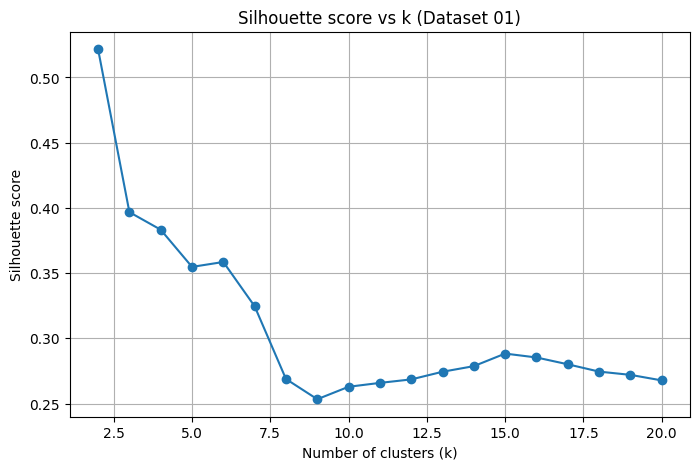

<Figure size 640x480 with 0 Axes>

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k (Dataset 01)")
plt.grid(True)
plt.show()
plt.savefig(
    "artifacts/figures/dataset01_silhouette_score_vs_k.png",
    dpi=150,
    bbox_inches="tight"
)


Из графика видно, что при меньшем к заначение выше. Возьму к = 2

In [44]:
k_opt = 2

kmeans_1 = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=10
)

labels_km_1 = kmeans_1.fit_predict(X1_scaled)


Метрики

In [47]:
metrics_km_1 = {
    "silhouette": silhouette_score(X1_scaled, labels_km_1),
    "davies_bouldin": davies_bouldin_score(X1_scaled, labels_km_1),
    "calinski_harabasz": calinski_harabasz_score(X1_scaled, labels_km_1),
}

metrics_km_1


{'silhouette': np.float64(0.5216395622404242),
 'davies_bouldin': np.float64(0.6853295219054457),
 'calinski_harabasz': np.float64(11786.954622671532)}

AgglomerativeClustering

In [50]:
linkages = ["ward", "average"]
agg_results_1 = {}

for linkage in linkages:
    agg = AgglomerativeClustering(
        n_clusters=k_opt,
        linkage=linkage
    )
    labels = agg.fit_predict(X1_scaled)
    
    agg_results_1[linkage] = {
        "labels": labels,
        "silhouette": silhouette_score(X1_scaled, labels),
        "davies_bouldin": davies_bouldin_score(X1_scaled, labels),
        "calinski_harabasz": calinski_harabasz_score(X1_scaled, labels),
    }

agg_results_1


{'ward': {'labels': array([0, 1, 1, ..., 0, 1, 0], shape=(12000,)),
  'silhouette': np.float64(0.5216395622404242),
  'davies_bouldin': np.float64(0.6853295219054457),
  'calinski_harabasz': np.float64(11786.954622671532)},
 'average': {'labels': array([0, 1, 1, ..., 0, 1, 0], shape=(12000,)),
  'silhouette': np.float64(0.5216395622404242),
  'davies_bouldin': np.float64(0.6853295219054457),
  'calinski_harabasz': np.float64(11786.954622671532)}}

Визуализация

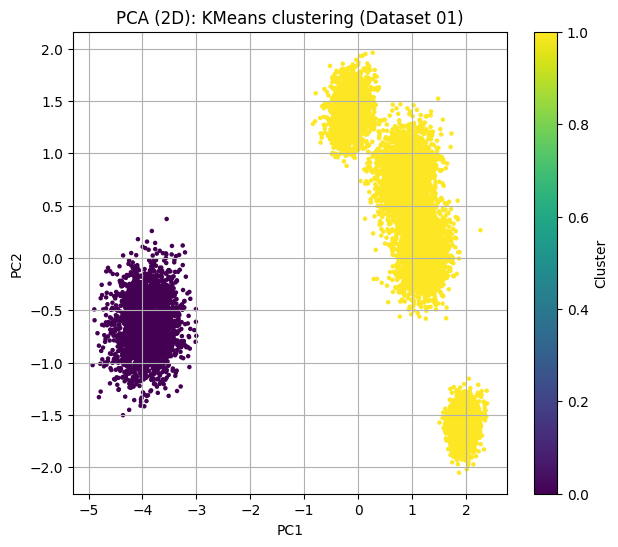

<Figure size 640x480 with 0 Axes>

In [54]:
pca = PCA(n_components=2, random_state=42)
X1_pca = pca.fit_transform(X1_scaled)
plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    X1_pca[:, 0],
    X1_pca[:, 1],
    c=labels_km_1,
    s=5
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D): KMeans clustering (Dataset 01)")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()
plt.savefig(
    "artifacts/figures/dataset01_pca_kmeans.png",
    dpi=150,
    bbox_inches="tight"
)

Проверка устойчивости

In [58]:
labels_runs = []

for rs in range(5):
    km = KMeans(
        n_clusters=2,
        random_state=rs,
        n_init=10
    )
    labels_runs.append(km.fit_predict(X1_scaled))
ari_scores = []

for i in range(len(labels_runs)):
    for j in range(i + 1, len(labels_runs)):
        ari_scores.append(
            adjusted_rand_score(labels_runs[i], labels_runs[j])
        )

np.mean(ari_scores), np.min(ari_scores)


(np.float64(1.0), np.float64(1.0))

Итог по Dataset 01

Датасет содержит только числовые признаки без пропусков, однако
масштабы признаков существенно различаются, что потребовало
обязательного применения StandardScaler.

Были сравнены методы KMeans и AgglomerativeClustering с различными
типами linkage. Для обоих алгоритмов при k = 2 были получены
идентичные значения всех метрик качества
(silhouette = 0.52, Davies–Bouldin = 0.69, Calinski–Harabasz ≈ 11787),
что указывает на простую и устойчивую кластерную структуру данных.

Дополнительная проверка устойчивости KMeans показала практически
полное совпадение разбиений при разных инициализациях
(ARI ≈ 1), что подтверждает надёжность результата.

В качестве итогового решения для данного датасета выбран KMeans
с k = 2 как наиболее простой, интерпретируемый и устойчивый метод.

dataset 2

In [60]:
df2 = pd.read_csv(data / "S07-hw-dataset-01.csv")
df2.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [62]:
df2.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [67]:
missing_counts2 = df2.isna().sum()
missing_ratio2 = df2.isna().mean()

pd.DataFrame({
    "missing_count": missing_counts2,
    "missing_ratio": missing_ratio2
})

,missing_count,missing_ratio
sample_id,0,0.0
f01,0,0.0
f02,0,0.0
f03,0,0.0
f04,0,0.0
f05,0,0.0
f06,0,0.0
f07,0,0.0
f08,0,0.0


In [65]:
numeric_features2 = df2.select_dtypes(include=["number"]).columns.tolist()
categorical_features2 = df2.select_dtypes(exclude=["number"]).columns.tolist()

numeric_features2, categorical_features2

(['sample_id', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08'], [])

In [68]:
sample_id_2 = df2["sample_id"]
X2 = df2.drop(columns=["sample_id"])
X2.head()

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


Препроцессинг

In [69]:
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X2_scaled = pipeline.fit_transform(X2)


Подбор параметров и модели

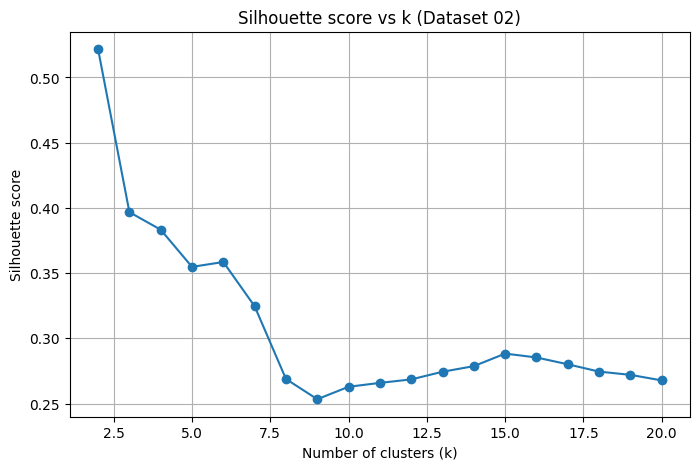

<Figure size 640x480 with 0 Axes>

In [73]:
silhouette_scores2 = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels2 = kmeans.fit_predict(X2_scaled)
    score2 = silhouette_score(X2_scaled, labels2)
    silhouette_scores2.append(score2)
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores2, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k (Dataset 02)")
plt.grid(True)
plt.show()
plt.savefig(
    "artifacts/figures/dataset02_silhouette_score_vs_k.png",
    dpi=150,
    bbox_inches="tight"
)

Опять же берем k=2

In [76]:
kmeans_2 = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=10
)

labels_km_2 = kmeans_2.fit_predict(X2_scaled)
metrics_km_2 = {
    "silhouette": silhouette_score(X2_scaled, labels_km_2),
    "davies_bouldin": davies_bouldin_score(X2_scaled, labels_km_2),
    "calinski_harabasz": calinski_harabasz_score(X2_scaled, labels_km_2),
}

metrics_km_2


{'silhouette': np.float64(0.5216395622404242),
 'davies_bouldin': np.float64(0.6853295219054457),
 'calinski_harabasz': np.float64(11786.954622671532)}

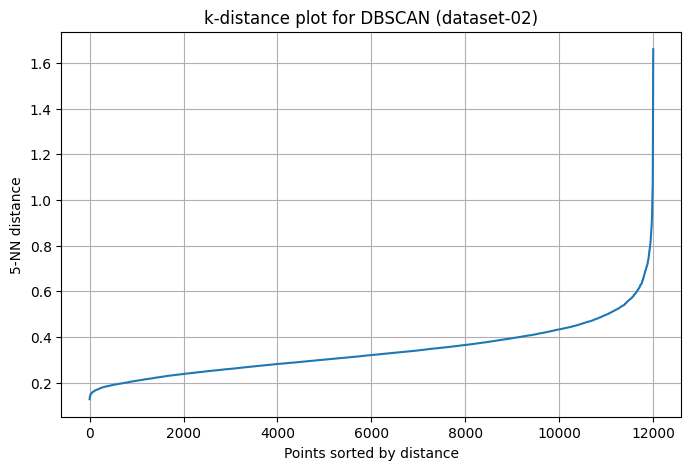

Noise fraction: 0.010833333333333361
DBSCAN metrics: {'silhouette': np.float64(0.38163610426903044), 'davies_bouldin': np.float64(1.2517620051869873), 'calinski_harabasz': np.float64(8432.692533211448)}


In [78]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X2_scaled)
distances, _ = neighbors_fit.kneighbors(X2_scaled)
distances = np.sort(distances[:,4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.ylabel('5-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-distance plot for DBSCAN (dataset-02)')
plt.grid(True)
plt.show()

eps_opt = 0.6
dbscan = DBSCAN(eps=eps_opt, min_samples=5)
labels_dbscan = dbscan.fit_predict(X2_scaled)
mask = labels_dbscan != -1
print("Noise fraction:", 1 - np.mean(mask))

dbscan_metrics = {
    "silhouette": silhouette_score(X2_scaled[mask], labels_dbscan[mask]),
    "davies_bouldin": davies_bouldin_score(X2_scaled[mask], labels_dbscan[mask]),
    "calinski_harabasz": calinski_harabasz_score(X2_scaled[mask], labels_dbscan[mask])
}
print("DBSCAN metrics:", dbscan_metrics)

Визуализация

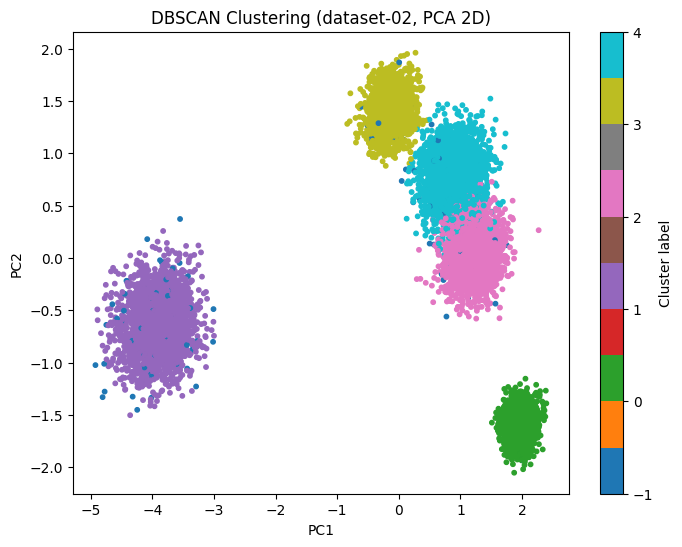

<Figure size 640x480 with 0 Axes>

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X2_pca = pca.fit_transform(X2_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=labels_dbscan, cmap='tab10', s=10)
plt.title('DBSCAN Clustering (dataset-02, PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster label')
plt.show()
plt.savefig(
    "artifacts/figures/dataset02_pca_DBSCAN.png",
    dpi=150,
    bbox_inches="tight"
)


Итог по Dataset 02

Датасет содержит только числовые признаки без пропусков, однако диапазоны значений признаков сильно различаются, что потребовало обязательного применения StandardScaler.
Были сравнены методы KMeans и DBSCAN.

Для KMeans при оптимальном k = 2 получены следующие метрики: silhouette ≈ 0.52, Davies–Bouldin ≈ 0.69, Calinski–Harabasz ≈ 11787

Алгоритм формирует кластеры, но плохо учитывает выбросы и нелинейную структуру плотных областей.

Для DBSCAN с eps = 0.6 и min_samples = 5:
silhouette ≈ 0.38, Davies–Bouldin ≈ 1.25, Calinski–Harabasz ≈ 8433, доля шума ≈ 1.08%

Алгоритм корректно выявляет плотные кластеры и отделяет редкие выбросы, отражая реальную структуру данных.

Сложности: присутствуют выбросы и шумовые признаки, а кластеры имеют нелинейную форму, что снижает эффективность KMeans.

В качестве итогового решения для данного датасета выбран DBSCAN с eps = 0.6, min_samples = 5, так как он лучше учитывает плотность и шум, что соответствует характеру dataset-02.